### Requiremnts Used:

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler

### Data Collection

In [3]:
df = pd.read_csv('C:/Users/hp/Desktop/elevvo pathway Internship/Tasks/Customer_Segmentation/Data/Mall_Customers.csv')

In [4]:
df.head()

CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.shape

(200, 5)

### Checking for Null Values or Duplicates

In [7]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

### Dataset Summary

In [9]:
df.describe()

CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000

In [10]:
df = df.rename(columns={'Genre': 'Gender'})
df.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [11]:
df.drop(columns='CustomerID',inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_6988\3717070803.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df[i] , palette='viridis')


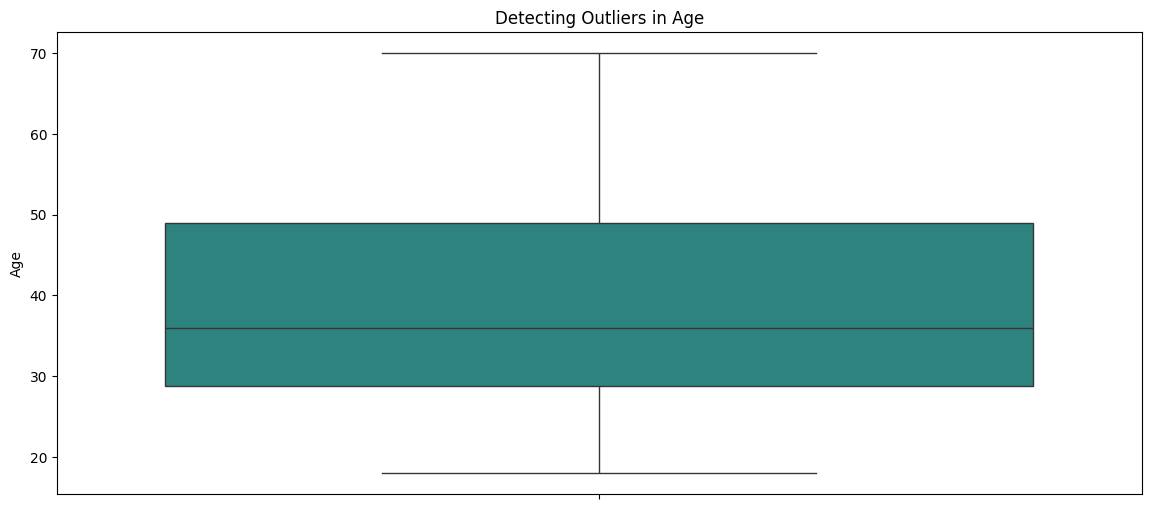

C:\Users\hp\AppData\Local\Temp\ipykernel_6988\3717070803.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df[i] , palette='viridis')


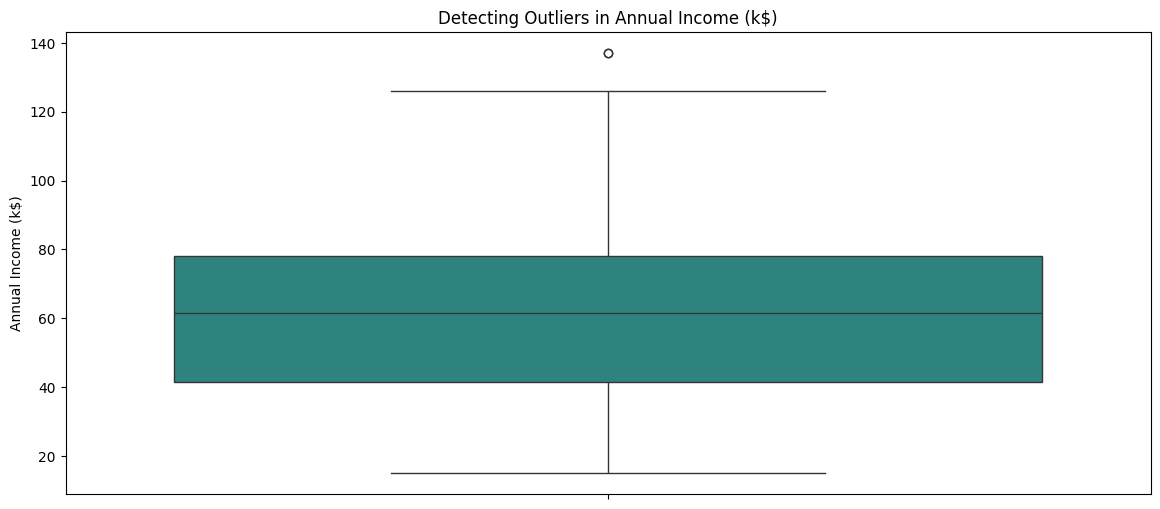

C:\Users\hp\AppData\Local\Temp\ipykernel_6988\3717070803.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df[i] , palette='viridis')


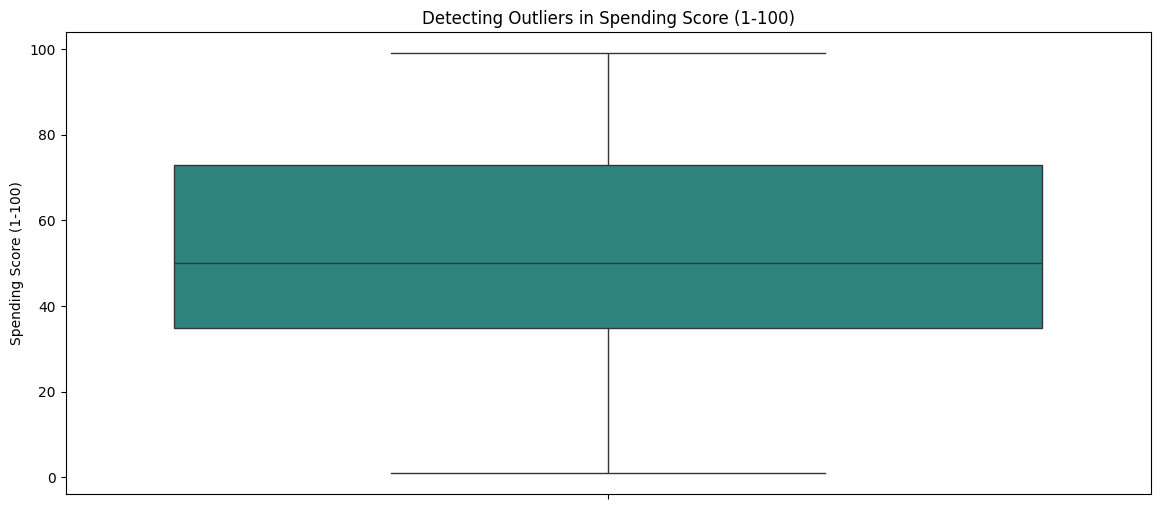

In [12]:
num_cols = df.select_dtypes(include=['int64','float64']).columns
for i in num_cols:
    plt.figure(figsize=(14,6))
    sns.boxplot(df[i] , palette='viridis')
    plt.title(f"Detecting Outliers in {i}")
    plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_6988\4263705337.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['Gender'] ,palette='viridis')


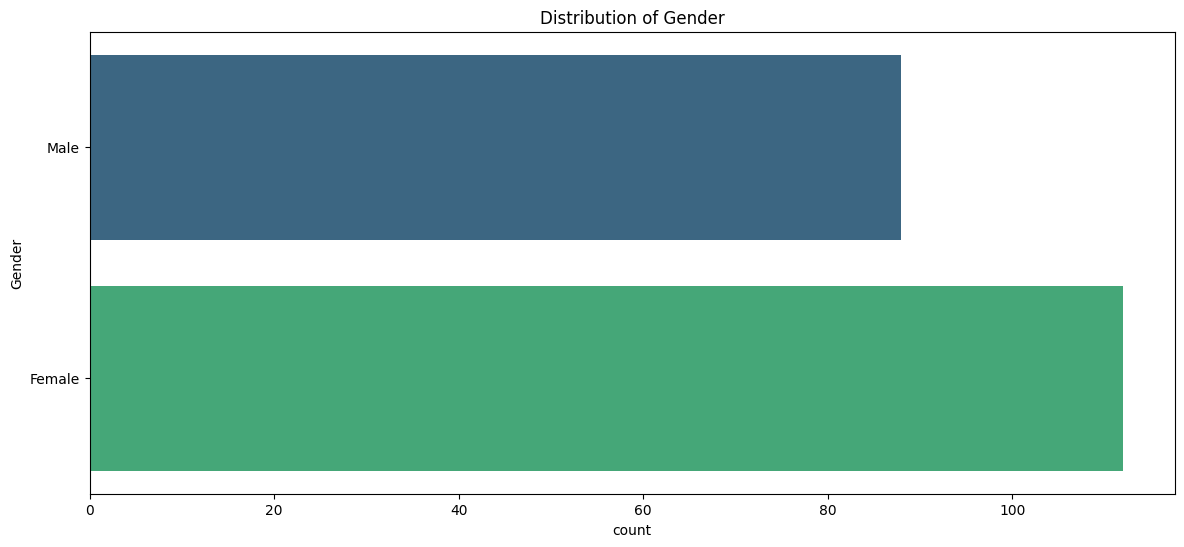

Gender
Female    112
Male       88
Name: count, dtype: int64

In [13]:
plt.figure(figsize=(14,6))
sns.countplot(df['Gender'] ,palette='viridis')
plt.title("Distribution of Gender")
plt.show()

df['Gender'].value_counts()

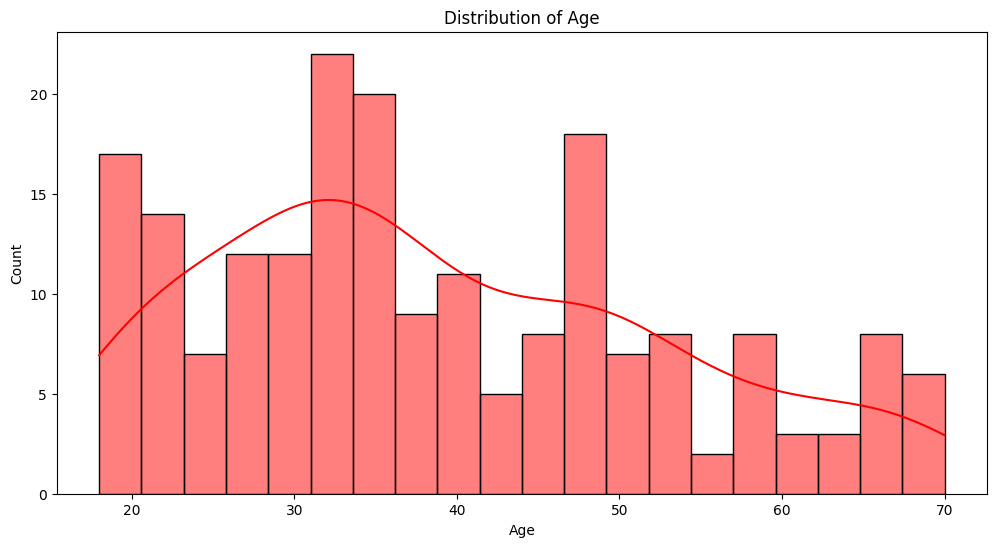

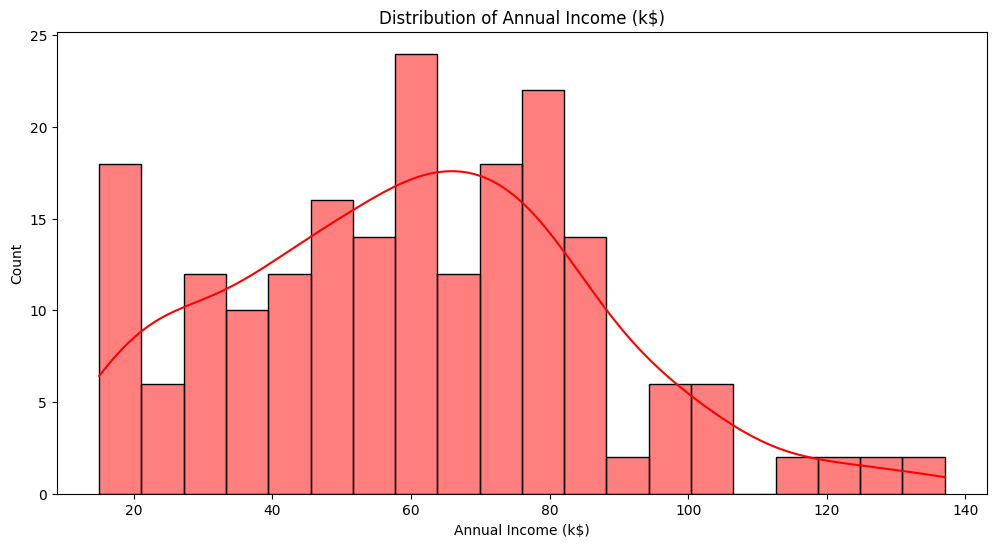

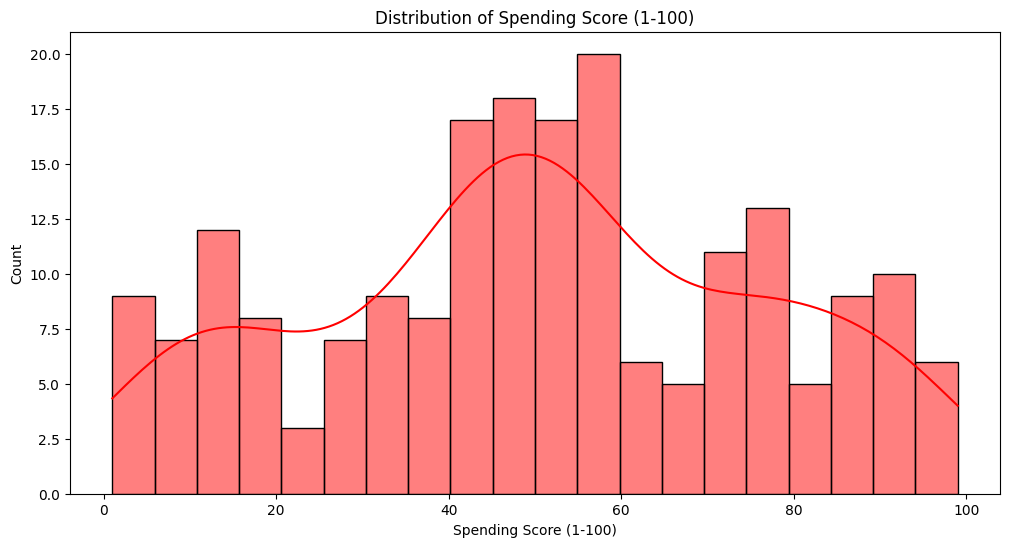

In [14]:
for i in num_cols:
    plt.figure(figsize=(12,6))
    sns.histplot(df[i] , color='red' , bins=20 , kde=True)
    plt.title(f"Distribution of {i}")
    plt.show()

### Encoding Gender Column

In [15]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df.head()

Gender  Age  Annual Income (k$)  Spending Score (1-100)
0       1   19                  15                      39
1       1   21                  15                      81
2       0   20                  16                       6
3       0   23                  16                      77
4       0   31                  17                      40

### Scaling Numerical columns

In [16]:
scale = StandardScaler()
num_cols = df.select_dtypes(include=['float64','int64']).columns
df[num_cols] = scale.fit_transform(df[num_cols])
df.head()

Gender       Age  Annual Income (k$)  Spending Score (1-100)
0  1.128152 -1.424569           -1.738999               -0.434801
1  1.128152 -1.281035           -1.738999                1.195704
2 -0.886405 -1.352802           -1.700830               -1.715913
3 -0.886405 -1.137502           -1.700830                1.040418
4 -0.886405 -0.563369           -1.662660               -0.395980

In [17]:
path = 'C:/Users/hp/Desktop/elevvo pathway Internship/Tasks/Customer_Segmentation/Data/Mall_Customers_processed.csv'
df.to_csv(path , index=False)
print("Data Saved Successfully !")

Data Saved Successfully !
